In [22]:
import pandas as pd
import numpy as np
import requests

In [23]:
url= "https://raw.githubusercontent.com/rohan-r-kulkarni/bigtech_randomforest/main/data.csv"
df = pd.read_csv(url)
df1=df.reset_index()
df1

,index,Unnamed: 0,AAPL US Equity,AAPL US Equity.1,AAPL US Equity.2,AAPL US Equity.3,AAPL US Equity.4,AAPL US Equity.5,AAPL US Equity.6,AAPL US Equity.7,...,SPX Index.1,SPX Index.2,SPX Index.3,SPX Index.4,SPX Index.5,SPX Index.6,SPX Index.7,SPX Index.8,SPX Index.9,SPX Index.10
0,0,NaN,1,2,3,4,5,6,7,8,...,2,3,4,5,6,7,8,9,10,11
1,1,Dates,PX_OPEN,PX_OFFICIAL_CLOSE,PE_RATIO,EV_EBITDA_ADJUSTED,SALES_GROWTH,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,...,PX_OFFICIAL_CLOSE,PE_RATIO,EV_EBITDA_ADJUSTED,SALES_GROWTH,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,PROF_MARGIN,EBITDA_TO_REVENUE,BEST_PX_SALES_RATIO
2,2,1/3/00,0.936,NaN,39.6143,NaN,37.0175,17999.4376,535819200,5.1223,...,NaN,28.1209,NaN,NaN,NaN,1071554100,2.99,7.61,NaN,NaN
3,3,1/4/00,0.967,NaN,36.2744,NaN,37.0175,16481.8971,511728000,5.5939,...,NaN,28.1744,NaN,NaN,NaN,1264023700,2.99,7.61,NaN,NaN
4,4,1/5/00,0.926,NaN,36.8052,NaN,37.0175,16723.0956,778321600,5.5133,...,NaN,28.2119,NaN,NaN,NaN,1177726200,2.98,7.61,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,11/28/22,145.14,144.22,23.6039,18.0919,8.1406,2294268.778,69346522,4.754,...,NaN,19.1332,NaN,NaN,34556774.68,517449991,4.95,11.17,NaN,2.2736
5978,5978,11/29/22,144.29,141.17,23.1047,18.0919,8.1406,2245749.018,83763803,4.8567,...,NaN,19.7254,NaN,NaN,35624829.34,1406250061,4.8,11.17,NaN,2.343
5979,5979,11/30/22,141.395,148.03,24.2275,18.0919,8.1406,2354878.708,111380880,4.6316,...,NaN,19.7083,NaN,NaN,35596739.87,633969105,4.8,11.17,NaN,2.3389
5980,5980,12/1/22,148.21,148.31,24.2733,18.0919,8.1406,2359332.981,71250416,4.6229,...,NaN,19.6847,NaN,NaN,35596739.87,633969105,4.81,11.17,NaN,2.336


In [24]:
df1.columns

Index(['index', 'Unnamed: 0', 'AAPL US Equity', 'AAPL US Equity.1',
       'AAPL US Equity.2', 'AAPL US Equity.3', 'AAPL US Equity.4',
       'AAPL US Equity.5', 'AAPL US Equity.6', 'AAPL US Equity.7',
       ...
       'SPX Index.1', 'SPX Index.2', 'SPX Index.3', 'SPX Index.4',
       'SPX Index.5', 'SPX Index.6', 'SPX Index.7', 'SPX Index.8',
       'SPX Index.9', 'SPX Index.10'],
      dtype='object', length=123)

In [25]:
df2=df1.rename(columns={"Unnamed: 0": "Dates"})
dates=df2.loc[2:, "Dates"].reset_index(drop=True)
dates=pd.to_datetime(dates)
dates

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5975   2022-11-28
5976   2022-11-29
5977   2022-11-30
5978   2022-12-01
5979   2022-12-02
Name: Dates, Length: 5980, dtype: datetime64[ns]

In [26]:
spx_i = 10
spx_df = pd.DataFrame(df2.iloc[1: , 2+11*spx_i:].reset_index(drop=True))
spx_df.columns = spx_df.iloc[0, :]
#spx_df.columns = spx_df.loc[1, :]
spx_df = pd.DataFrame(spx_df.iloc[1:, 0]).reset_index(drop=True)
spx_df

,PX_OPEN
0,1455.22
1,1399.42
2,1402.11
3,1403.45
4,1441.47
...,...
5975,3964.19
5976,3957.18
5977,4087.14
5978,4040.17


In [50]:
import yfinance as yf

stocks = {}
drop = ["SALES_GROWTH", "PROF_MARGIN", "EBITDA_TO_REVENUE","EV_EBITDA_ADJUSTED"]
names = []

for i in range(0, 10):
    this_name = df2.columns[2+11*i].split(" ")[0]

    this_df = df2.iloc[1: , 2+11*i:13+11*i].reset_index(drop=True)
    this_df.columns = this_df.loc[0, :]
    this_df = this_df.drop(drop, axis = 1)
    this_df = this_df.loc[1:, :].reset_index(drop=True)
    this_df = pd.concat([dates, this_df], axis=1)

    this_df = this_df.reindex(['Dates', 'PX_OPEN', 'PE_RATIO', 'CUR_MKT_CAP',
        'PX_VOLUME', 'FREE_CASH_FLOW_YIELD', 'BEST_PX_SALES_RATIO','PX_OFFICIAL_CLOSE'],axis=1)
    
            
    this_df=this_df.set_index("Dates")
    this_df=this_df.astype(float)

    start_date = pd.to_datetime(this_df.index)[0]
    end_date = pd.to_datetime(this_df.index)[-1]
    
    start_date = start_date.strftime("%Y-%m-%d")
    end_date = end_date.strftime("%Y-%m-%d")

    
    yf_data = yf.download(this_name, start=start_date, end=end_date)
    yf_data = yf_data.loc[:, ["High", "Low", "Adj Close"]]
    
    yf_data = yf_data.rename({"High": "HIGH", "Low":"LOW", "Adj Close": "ADJ_CLOSE"}, axis=1)
    
    this_df = this_df.join(yf_data)
    
    this_df = this_df.dropna()

    if len(this_df) < 500:
        continue # do not include stocks with too small df
    
    names.append(this_name)

    stocks[this_name] = this_df
    
    
#stocks

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [51]:
names

['AAPL', 'META', 'AMZN', 'NFLX', 'TSLA', 'MSFT', 'IBM', 'INTC']

<h1> Data processing done </h1>
<h1> Work with TSLA first </h1>

In [52]:
s = "TSLA"

In [53]:

# test=appl['Dates', 'PX_OPEN', 'PE_RATIO', 'CUR_MKT_CAP',
#        'PX_VOLUME', 'FREE_CASH_FLOW_YIELD', 'BEST_PX_SALES_RATIO']
stocks[s]

,PX_OPEN,PE_RATIO,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,BEST_PX_SALES_RATIO,PX_OFFICIAL_CLOSE,HIGH,LOW,ADJ_CLOSE
Dates,,,,,,,,,,
2020-03-30,33.417,3314.4628,96473.4231,266572275.0,1.1990,1.461,34.933,34.443333,32.748669,33.475334
2020-03-31,33.600,3046.0166,88659.8122,200297700.0,1.3047,1.342,32.104,36.197334,33.133331,34.933334
2020-04-01,32.069,2874.6640,83672.2835,297876405.0,1.3825,1.270,30.298,34.263332,31.673332,32.104000
2020-04-02,33.967,3036.2124,88374.4424,338431140.0,1.3089,1.341,32.001,32.950668,29.760000,30.298000
2020-04-03,34.080,3265.3784,95044.7327,223527540.0,1.2170,1.442,34.416,34.366001,31.226000,32.000668
...,...,...,...,...,...,...,...,...,...,...
2022-11-25,179.960,55.9552,577616.0780,93038148.0,1.5729,5.201,182.920,185.199997,180.630005,182.860001
2022-11-28,184.990,55.3159,571016.3754,83357111.0,1.5911,5.141,180.830,188.500000,179.000000,182.919998
2022-11-29,182.430,59.5587,614814.4018,109186404.0,1.4778,5.536,194.700,186.380005,178.750000,180.830002


<h2> Do shift of price series </h2>

In [54]:
day_change = stocks[s].loc[:,"PX_OFFICIAL_CLOSE"] - stocks[s].loc[:,"PX_OPEN"] #close - open
buy_indicator = (day_change>0).astype(int).shift(1) #True = BUY, False = SELL
stocks[s]=stocks[s].assign(day_change=day_change)
stocks[s]=stocks[s].assign(buy_indicator=buy_indicator)

stocks[s] = stocks[s].dropna()
buy_indicator = buy_indicator.dropna()
stocks[s]

,PX_OPEN,PE_RATIO,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,BEST_PX_SALES_RATIO,PX_OFFICIAL_CLOSE,HIGH,LOW,ADJ_CLOSE,day_change,buy_indicator
Dates,,,,,,,,,,,,
2020-03-31,33.600,3046.0166,88659.8122,200297700.0,1.3047,1.342,32.104,36.197334,33.133331,34.933334,-1.496,1.0
2020-04-01,32.069,2874.6640,83672.2835,297876405.0,1.3825,1.270,30.298,34.263332,31.673332,32.104000,-1.771,0.0
2020-04-02,33.967,3036.2124,88374.4424,338431140.0,1.3089,1.341,32.001,32.950668,29.760000,30.298000,-1.966,0.0
2020-04-03,34.080,3265.3784,95044.7327,223527540.0,1.2170,1.442,34.416,34.366001,31.226000,32.000668,0.336,0.0
2020-04-06,36.333,3450.1407,100422.5737,268796760.0,1.1519,1.524,36.363,34.733334,33.197334,34.416000,0.030,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,179.960,55.9552,577616.0780,93038148.0,1.5729,5.201,182.920,185.199997,180.630005,182.860001,2.960,1.0
2022-11-28,184.990,55.3159,571016.3754,83357111.0,1.5911,5.141,180.830,188.500000,179.000000,182.919998,-4.160,1.0
2022-11-29,182.430,59.5587,614814.4018,109186404.0,1.4778,5.536,194.700,186.380005,178.750000,180.830002,12.270,0.0


<h2>1. OBV </h2>

In [55]:
obv = stocks[s].copy().loc[:, ["PX_VOLUME", "ADJ_CLOSE"]]
obv

,PX_VOLUME,ADJ_CLOSE
Dates,,
2020-03-31,200297700.0,34.933334
2020-04-01,297876405.0,32.104000
2020-04-02,338431140.0,30.298000
2020-04-03,223527540.0,32.000668
2020-04-06,268796760.0,34.416000
...,...,...
2022-11-25,93038148.0,182.860001
2022-11-28,83357111.0,182.919998
2022-11-29,109186404.0,180.830002


In [66]:
obv=obv.assign(prev_close=obv.loc[:, "ADJ_CLOSE"].shift(1))
vols=obv.loc[:, "PX_VOLUME"].shift(1)
vols.values[0] = 0
vols
obv=obv.assign(prev_vol=vols)

In [68]:
obv

,PX_VOLUME,ADJ_CLOSE,prev_close,prev_vol
Dates,,,,
2020-03-31,200297700.0,34.933334,NaN,0.0
2020-04-01,297876405.0,32.104000,34.933334,200297700.0
2020-04-02,338431140.0,30.298000,32.104000,297876405.0
2020-04-03,223527540.0,32.000668,30.298000,338431140.0
2020-04-06,268796760.0,34.416000,32.000668,223527540.0
...,...,...,...,...
2022-11-25,93038148.0,182.860001,183.199997,109536709.0
2022-11-28,83357111.0,182.919998,182.860001,93038148.0
2022-11-29,109186404.0,180.830002,182.919998,83357111.0


In [69]:
def calc_obv(x):
    if x.ADJ_CLOSE > x.prev_close:
        return x.prev_vol + x.PX_VOLUME
    elif x.ADJ_CLOSE < x.prev_close:
        return x.prev_vol - x.PX_VOLUME
    else:
        return x.prev_vol

In [83]:
OBV_FIN=obv.apply(calc_obv, axis=1)
obv=obv.assign(OBV_FIN=OBV_FIN)
obv=obv.assign(close_change = obv.ADJ_CLOSE-obv.prev_close)
obv=obv.assign(volume_change = obv.PX_VOLUME-obv.prev_vol)

obv

,PX_VOLUME,ADJ_CLOSE,prev_close,prev_vol,OBV_FIN,close_change,volume_change
Dates,,,,,,,
2020-03-31,200297700.0,34.933334,NaN,0.0,0.0,NaN,200297700.0
2020-04-01,297876405.0,32.104000,34.933334,200297700.0,-97578705.0,-2.829334,97578705.0
2020-04-02,338431140.0,30.298000,32.104000,297876405.0,-40554735.0,-1.806000,40554735.0
2020-04-03,223527540.0,32.000668,30.298000,338431140.0,561958680.0,1.702667,-114903600.0
2020-04-06,268796760.0,34.416000,32.000668,223527540.0,492324300.0,2.415333,45269220.0
...,...,...,...,...,...,...,...
2022-11-25,93038148.0,182.860001,183.199997,109536709.0,16498561.0,-0.339996,-16498561.0
2022-11-28,83357111.0,182.919998,182.860001,93038148.0,176395259.0,0.059998,-9681037.0
2022-11-29,109186404.0,180.830002,182.919998,83357111.0,-25829293.0,-2.089996,25829293.0


In [92]:
obv_indicator = ((obv.OBV_FIN.diff() > 0) & (obv.close_change > 0)).astype(int).shift(1)
obv_indicator

Dates
2020-03-31    NaN
2020-04-01    0.0
2020-04-02    0.0
2020-04-03    0.0
2020-04-06    1.0
             ... 
2022-11-25    1.0
2022-11-28    0.0
2022-11-29    1.0
2022-11-30    0.0
2022-12-01    1.0
Length: 675, dtype: float64

In [93]:
stocks[s]=stocks[s].assign(OBV_indicator=obv_indicator)

In [94]:
stocks[s]

,PX_OPEN,PE_RATIO,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,BEST_PX_SALES_RATIO,PX_OFFICIAL_CLOSE,HIGH,LOW,ADJ_CLOSE,day_change,buy_indicator,OBV,OBV_indicator
Dates,,,,,,,,,,,,,,
2020-03-31,33.600,3046.0166,88659.8122,200297700.0,1.3047,1.342,32.104,36.197334,33.133331,34.933334,-1.496,1.0,0.0,NaN
2020-04-01,32.069,2874.6640,83672.2835,297876405.0,1.3825,1.270,30.298,34.263332,31.673332,32.104000,-1.771,0.0,-97578705.0,0.0
2020-04-02,33.967,3036.2124,88374.4424,338431140.0,1.3089,1.341,32.001,32.950668,29.760000,30.298000,-1.966,0.0,-40554735.0,0.0
2020-04-03,34.080,3265.3784,95044.7327,223527540.0,1.2170,1.442,34.416,34.366001,31.226000,32.000668,0.336,0.0,561958680.0,0.0
2020-04-06,36.333,3450.1407,100422.5737,268796760.0,1.1519,1.524,36.363,34.733334,33.197334,34.416000,0.030,1.0,492324300.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,179.960,55.9552,577616.0780,93038148.0,1.5729,5.201,182.920,185.199997,180.630005,182.860001,2.960,1.0,16498561.0,1.0
2022-11-28,184.990,55.3159,571016.3754,83357111.0,1.5911,5.141,180.830,188.500000,179.000000,182.919998,-4.160,1.0,176395259.0,0.0
2022-11-29,182.430,59.5587,614814.4018,109186404.0,1.4778,5.536,194.700,186.380005,178.750000,180.830002,12.270,0.0,-25829293.0,1.0


<h2>2. Bollinger Band </h2>

In [90]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
boll_df = stocks[s].copy()

In [91]:
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 10
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = boll_df['PX_OFFICIAL_CLOSE'].rolling(window).mean()
rolling_std = boll_df['PX_OFFICIAL_CLOSE'].rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
boll_df['Rolling Mean'] = rolling_mean
boll_df['Bollinger High'] = rolling_mean + (rolling_std * no_of_std)
boll_df['Bollinger Low'] = rolling_mean - (rolling_std * no_of_std)

In [95]:
boll_indicator = ((boll_df.PX_OFFICIAL_CLOSE > 0) & (boll_df['Bollinger Low'] > 0)).astype(int).shift(1)
boll_indicator


Dates
2020-03-31    NaN
2020-04-01    0.0
2020-04-02    0.0
2020-04-03    0.0
2020-04-06    0.0
             ... 
2022-11-25    1.0
2022-11-28    1.0
2022-11-29    1.0
2022-11-30    1.0
2022-12-01    1.0
Length: 675, dtype: float64

/var/folders/g0/vly43npx24nf2s_dtjcp9lq80000gn/T/ipykernel_69699/2037186247.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[row] = -1
/var/folders/g0/vly43npx24nf2s_dtjcp9lq80000gn/T/ipykernel_69699/2037186247.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[row] = 1
/usr/local/anaconda3/envs/csor/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Dates'>

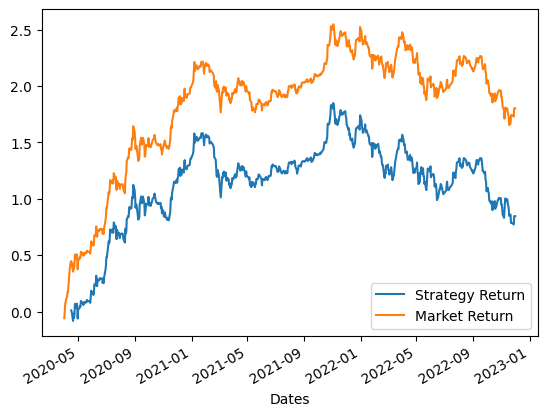

In [39]:
#Create an "empty" column as placeholder for our /position signals
df['Position'] = None
#Fill our newly created position column - set to sell (-1) when the price hits the upper band, and set to buy (1) when it hits the lower band
for row in range(1,len(df)):
    
    if (df['PX_OFFICIAL_CLOSE'].iloc[row-1] < df['Bollinger High'].iloc[row-1]):
        df['Position'].iloc[row] = -1

    if (df['PX_OFFICIAL_CLOSE'].iloc[row-1] > df['Bollinger Low'].iloc[row-1]):
        df['Position'].iloc[row] = 1


#Forward fill our position column to replace the "None" values with the correct long/short positions to represent the "holding" of our position
#forward through time
df['Position'].fillna(method='ffill',inplace=True)
#Calculate the daily market return and multiply that by the position to determine strategy returns
df['Market Return'] = np.log(df['PX_OFFICIAL_CLOSE'] / df['PX_OFFICIAL_CLOSE'].shift(1))
df['Strategy Return'] = df['Market Return'] * df['Position'].shift(1)
#Plot the strategy returns
df[['Strategy Return','Market Return']].cumsum().plot()

<h2>3. MACD (Exponential) </h2>

In [40]:
stocks[s].loc[:, ["ADJ_CLOSE"]]

,ADJ_CLOSE
Dates,
2020-03-31,34.933334
2020-04-01,32.104000
2020-04-02,30.298000
2020-04-03,32.000668
2020-04-06,34.416000
...,...
2022-11-25,182.860001
2022-11-28,182.919998
2022-11-29,180.830002


In [41]:
ema_12=stocks[s].loc[:, ["ADJ_CLOSE"]].ewm(min_periods=12, com=12-1).mean()
ema_26=stocks[s].loc[:, ["ADJ_CLOSE"]].ewm(min_periods=26, com=26-1).mean()

In [42]:
macd = ema_12-ema_26
macd.dropna()

,ADJ_CLOSE
Dates,
2020-05-06,1.700331
2020-05-07,1.723950
2020-05-08,1.826337
2020-05-11,1.889946
2020-05-12,1.934018
...,...
2022-11-25,-22.725863
2022-11-28,-22.457142
2022-11-29,-22.242093


<h2>4. Volume Weighted Average Price </h2>

In [43]:
vwap=stocks[s].copy().loc[:, ["HIGH", "LOW", "ADJ_CLOSE", "PX_VOLUME"]]
typ_price=vwap.loc[:, ["HIGH", "LOW", "ADJ_CLOSE"]].mean(axis=1)
vwap

,HIGH,LOW,ADJ_CLOSE,PX_VOLUME
Dates,,,,
2020-03-31,36.197334,33.133331,34.933334,200297700.0
2020-04-01,34.263332,31.673332,32.104000,297876405.0
2020-04-02,32.950668,29.760000,30.298000,338431140.0
2020-04-03,34.366001,31.226000,32.000668,223527540.0
2020-04-06,34.733334,33.197334,34.416000,268796760.0
...,...,...,...,...
2022-11-25,185.199997,180.630005,182.860001,93038148.0
2022-11-28,188.500000,179.000000,182.919998,83357111.0
2022-11-29,186.380005,178.750000,180.830002,109186404.0


In [44]:
vol = vwap.loc[:, ["PX_VOLUME"]]
cum_tp = typ_price.cumsum()
cum_vol=vol.cumsum()
vwap = vwap.assign(cum_tp=cum_tp)
vwap = vwap.assign(cum_vol=cum_vol)

vwap

,HIGH,LOW,ADJ_CLOSE,PX_VOLUME,cum_tp,cum_vol
Dates,,,,,,
2020-03-31,36.197334,33.133331,34.933334,200297700.0,34.754667,2.002977e+08
2020-04-01,34.263332,31.673332,32.104000,297876405.0,67.434888,4.981741e+08
2020-04-02,32.950668,29.760000,30.298000,338431140.0,98.437778,8.366052e+08
2020-04-03,34.366001,31.226000,32.000668,223527540.0,130.968667,1.060133e+09
2020-04-06,34.733334,33.197334,34.416000,268796760.0,165.084223,1.328930e+09
...,...,...,...,...,...,...
2022-11-25,185.199997,180.630005,182.860001,93038148.0,149661.629489,7.700016e+10
2022-11-28,188.500000,179.000000,182.919998,83357111.0,149845.102821,7.708351e+10
2022-11-29,186.380005,178.750000,180.830002,109186404.0,150027.089490,7.719270e+10


In [45]:
def calc_vwap(x):
    return (x.cum_tp * x.PX_VOLUME)/(x.cum_vol)

vwap=vwap.assign(VWAP=vwap.apply(calc_vwap, axis=1))
vwap

,HIGH,LOW,ADJ_CLOSE,PX_VOLUME,cum_tp,cum_vol,VWAP
Dates,,,,,,,
2020-03-31,36.197334,33.133331,34.933334,200297700.0,34.754667,2.002977e+08,34.754667
2020-04-01,34.263332,31.673332,32.104000,297876405.0,67.434888,4.981741e+08,40.321771
2020-04-02,32.950668,29.760000,30.298000,338431140.0,98.437778,8.366052e+08,39.820943
2020-04-03,34.366001,31.226000,32.000668,223527540.0,130.968667,1.060133e+09,27.614563
2020-04-06,34.733334,33.197334,34.416000,268796760.0,165.084223,1.328930e+09,33.390863
...,...,...,...,...,...,...,...
2022-11-25,185.199997,180.630005,182.860001,93038148.0,149661.629489,7.700016e+10,180.833930
2022-11-28,188.500000,179.000000,182.919998,83357111.0,149845.102821,7.708351e+10,162.040550
2022-11-29,186.380005,178.750000,180.830002,109186404.0,150027.089490,7.719270e+10,212.208129


<h2>5. RSI </h2>

In [46]:
#RSI (Relative Strength Index)
def rsi(df, periods = 14, ema = True):
    #ema: exponential moving average (good lag indicators for stocks)
    #     not predictive of future prices; they simply highlight the trend that is being followed by the stock price
    
    close_delta = df['ADJ_CLOSE'].diff()
    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)    
    if ema == True:
        # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    # new_df = df
    # new_df['RSI'] = rsi
    # return new_df
#     df["rsi"] = 0
#     if (rsi > 70):
#         df["rsi"] = -1
#     else if (rsi < 30):
#         df["rsi"] = 1
    return rsi

#Example for TSLA, can uncomment the above lines and comment out 'return rsi' for gen method 
# df.apply(lambda x: rsi(x, periods = 14, ema = True))


/usr/local/anaconda3/envs/csor/lib/python3.9/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Dates'>

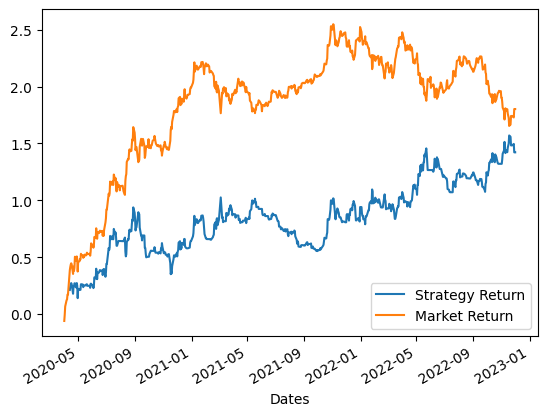

In [47]:
#Example for TSLA, can uncomment the above lines and comment out 'return rsi' for gen method 
stocks[s]['RSI'] = rsi(stocks[s], periods = 7 , ema = True)

# Threshold for RSI: 30 < buy, 70 > sell
min_size=50
max_size=60
mask_hold = ((stocks[s]['RSI'] > min_size) |(stocks[s]['RSI'] < max_size))
mask_less = ((stocks[s]['RSI'] < min_size))
mask_more = ((stocks[s]['RSI'] > max_size))

stocks[s]['RSI_buy_indicator'] = stocks[s]['RSI'].mask(mask_hold,0).mask(mask_less,-1).mask(mask_more,+1)
stocks[s]['RSI_buy_indicator'].value_counts()

# stocks[s]['RSI_buy_indicator']
df = stocks[s]
#Forward fill our position column to replace the "None" values with the correct long/short positions to represent the "holding" of our position
#forward through time
df['RSI_buy_indicator'].fillna(method='ffill',inplace=True)
#Calculate the daily market return and multiply that by the position to determine strategy returns
df['Market Return'] = np.log(df['PX_OFFICIAL_CLOSE'] / df['PX_OFFICIAL_CLOSE'].shift(1))
df['Strategy Return'] = df['Market Return'] * df['RSI_buy_indicator'].shift(1)
#Plot the strategy returns
df[['Strategy Return','Market Return']].cumsum().plot()

In [49]:
stocks[s]

,PX_OPEN,PE_RATIO,CUR_MKT_CAP,PX_VOLUME,FREE_CASH_FLOW_YIELD,BEST_PX_SALES_RATIO,PX_OFFICIAL_CLOSE,HIGH,LOW,ADJ_CLOSE,day_change,buy_indicator,Rolling Mean,Bollinger High,Bollinger Low,Position,Market Return,Strategy Return,RSI,RSI_buy_indicator
Dates,,,,,,,,,,,,,,,,,,,,
2020-03-31,33.600,3046.0166,88659.8122,200297700.0,1.3047,1.342,32.104,36.197334,33.133331,34.933334,-1.496,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,32.069,2874.6640,83672.2835,297876405.0,1.3825,1.270,30.298,34.263332,31.673332,32.104000,-1.771,0.0,NaN,NaN,NaN,NaN,-0.057899,NaN,NaN,NaN
2020-04-02,33.967,3036.2124,88374.4424,338431140.0,1.3089,1.341,32.001,32.950668,29.760000,30.298000,-1.966,0.0,NaN,NaN,NaN,NaN,0.054685,NaN,NaN,NaN
2020-04-03,34.080,3265.3784,95044.7327,223527540.0,1.2170,1.442,34.416,34.366001,31.226000,32.000668,0.336,0.0,NaN,NaN,NaN,NaN,0.072754,NaN,NaN,NaN
2020-04-06,36.333,3450.1407,100422.5737,268796760.0,1.1519,1.524,36.363,34.733334,33.197334,34.416000,0.030,1.0,NaN,NaN,NaN,NaN,0.055030,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,179.960,55.9552,577616.0780,93038148.0,1.5729,5.201,182.920,185.199997,180.630005,182.860001,2.960,1.0,182.275,198.767496,165.782504,1.0,-0.001530,0.001530,45.075323,-1.0
2022-11-28,184.990,55.3159,571016.3754,83357111.0,1.5911,5.141,180.830,188.500000,179.000000,182.919998,-4.160,1.0,181.263,196.590483,165.935517,1.0,-0.011492,0.011492,45.164333,-1.0
2022-11-29,182.430,59.5587,614814.4018,109186404.0,1.4778,5.536,194.700,186.380005,178.750000,180.830002,12.270,0.0,181.291,196.725952,165.856048,1.0,0.073903,-0.073903,42.373552,-1.0


<h2> Build independent, dependent variables and train/test split </h2>

In [48]:
#get indepdendent variables
x = stocks[s].iloc[:, 'PE_RATIO', 'CUR_MKT_CAP', 'PX_VOLUME',
       'FREE_CASH_FLOW_YIELD', 'BEST_PX_SALES_RATIO',
       'High', 'Low', 'Adj Close', 'day_change', 'buy_indicator'
                  ]
x

IndexingError: Too many indexers

In [ ]:
from sklearn.model_selection import train_test_split
#Get x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(x, buy_indicator, test_size = 0.3, train_size = 0.7, random_state=42)
#And check the shape
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

<h3> RF classifier </h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42,n_estimators=80,max_depth=10,min_samples_leaf=1000,min_samples_split=4000)
rf.fit(x_train,y_train.astype(int))


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import average_precision_score,roc_auc_score

y_test_pred = rf.predict(x_test)
cfm = confusion_matrix(y_test,y_test_pred)

accuracy_training = rf.score(x_train,y_train)
accuracy_testing = rf.score(x_test,y_test)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

y_prob = rf.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, y_prob)

ap = average_precision_score(y_test, y_test_pred)

print("Confusion Matrix: \n",cfm)
print("Training accuracy: ",accuracy_training)
print("Testing  accuracy: ",accuracy_testing)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1-Score: ",f1)
print("AUC: ",auc)
print("Average Precision: ",ap)

In [ ]:
y_test_pred

<h3> Linear Classifier </h3>

In [ ]:
from sklearn.linear_model import SGDClassifier
model_1 = SGDClassifier(random_state=42,max_iter=1000,loss="log") 
model_1.fit(x_train,y_train) 

In [ ]:
y_train

In [ ]:
y_test_pred = model_1.predict(x_test)
y_test_pred

In [ ]:
model_1.score(x_train, y_train)

In [ ]:
model_1.score(x_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import average_precision_score,roc_auc_score

y_test_pred = model_1.predict(x_test)
cfm = confusion_matrix(y_test,y_test_pred)

accuracy_training = model_1.score(x_train,y_train)
accuracy_testing = model_1.score(x_test,y_test)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

y_prob = model_1.predict_proba(x_test)[:,1]
auc = roc_auc_score(y_test, y_prob)

ap = average_precision_score(y_test, y_test_pred)

print("Confusion Matrix: \n",cfm)
print("Training accuracy: ",accuracy_training)
print("Testing  accuracy: ",accuracy_testing)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1-Score: ",f1)
print("AUC: ",auc)
print("Average Precision: ", ap)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
model_4 = RandomForestClassifier(n_estimators=100,max_depth=200,min_samples_leaf=5000,min_samples_split=4000)
model_4.fit(x_train,y_train)

In [ ]:
y_test_pred = model_4.predict(x_test)
y_test_pred

In [ ]:
x = stocks["AAPL"].iloc[:,1:-1].astype(float) 

y

In [ ]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer, make_column_transformer

# preprocess = make_column_transformer(
#     (StandardScaler(),[
#         'PE_RATIO', 
#         'CUR_MKT_CAP', 
#         'PX_VOLUME', 
#         'FREE_CASH_FLOW_YIELD', 
#         'BEST_PX_SALES_RATIO'
#     ])

# )

# X = preprocess.fit_transform(stocks[s])
# X

In [ ]:
x

In [ ]:
stocks['AAPL'] = stocks['AAPL'].assign(y = y)
stocks['AAPL']['signal'] = stocks['AAPL']["y"].apply(lambda x: 0 if x <0 else 1)


In [ ]:
y = stocks['AAPL']['signal']

In [ ]:
from sklearn.model_selection import train_test_split
#Get x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

#And check the shape
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators=100,max_depth=200,min_samples_leaf=5000,min_samples_split=4000)
model_4.fit(x_train,y_train)

In [ ]:
y_test_pred = model_4.predict(x_test)
y_test_pred

In [ ]:
y_test